In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import seaborn as sns
import matplotlib.pyplot as plt

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')
gender = pd.read_csv('../input/titanic/gender_submission.csv')

# Data Familiarization

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
train.info()
print(' ')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass

In [7]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [8]:
test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by='Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

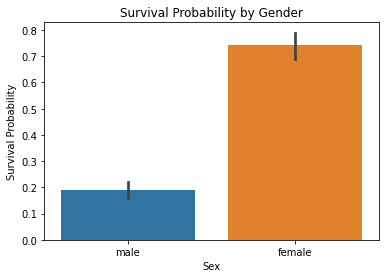

In [13]:
sns.barplot(x = 'Sex', y = 'Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

We are given a gender based test submission to start. This predicts survivability based off of the gender of the passangers alone which, judging by the histogram above, is a decent predictor. This will be submitted for grading as a control metric to imporve upon with machine learning.

In [14]:
gender.to_csv('control_submission.csv', index=False)

Using gender as a predictor of survivability alone has yielded an accuracy of 0.76555.
Now we will search for additional patterns and harness these for imporved accuracy.

# Data examination and cleaning

In [15]:
df_num = train[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = train[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


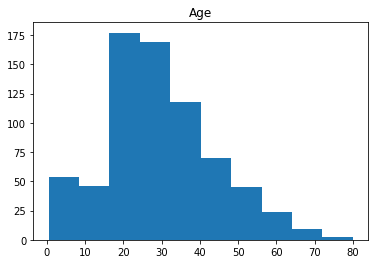

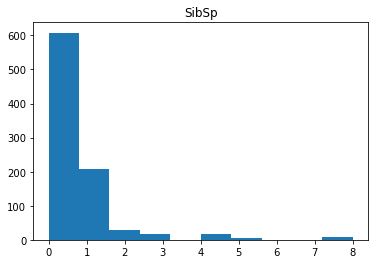

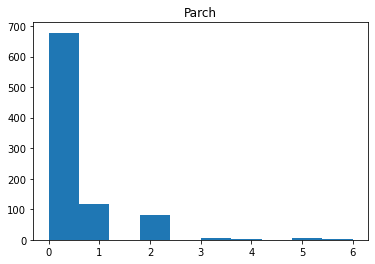

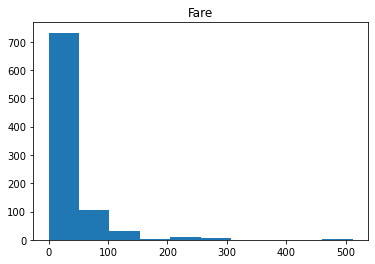

In [16]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [17]:
print(df_num.corr())

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


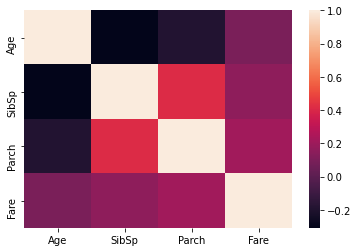

In [18]:
sns.heatmap(df_num.corr())

In [19]:
pd.pivot_table(train, index = 'Survived', values = ['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


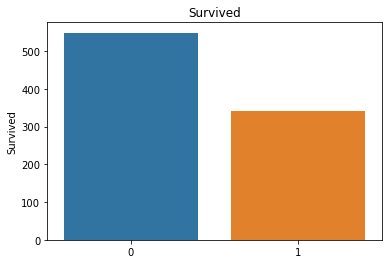

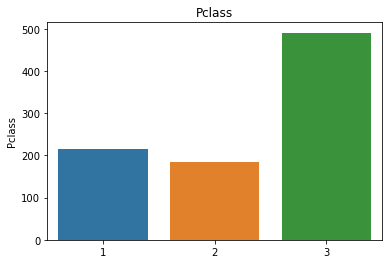

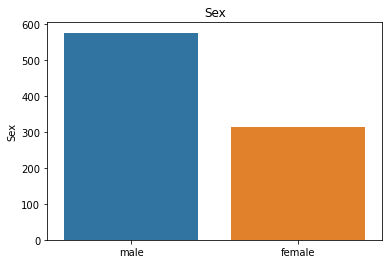

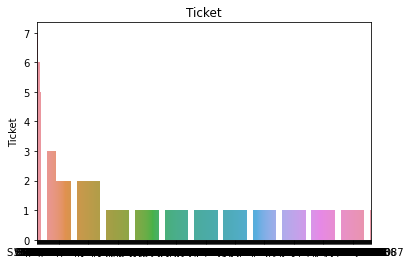

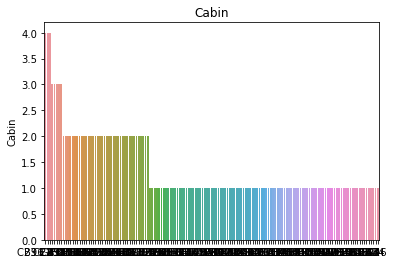

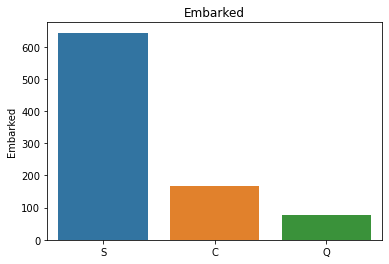

In [20]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index, df_cat[i].value_counts()).set_title(i)
    plt.show()

In [21]:
pd.pivot_table(train, index = 'Survived', columns = 'Pclass', values = 'Ticket', aggfunc = 'count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [22]:
pd.pivot_table(train, index = 'Survived', columns = 'Sex', values = 'Ticket', aggfunc = 'count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [23]:
pd.pivot_table(train, index = 'Survived', columns = 'Embarked', values = 'Ticket', aggfunc = 'count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [24]:
train[['Pclass', 'Survived']].groupby('Pclass', as_index = False).mean().sort_values(by='Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [25]:
train[['Embarked', 'Survived']].groupby('Embarked', as_index = False).mean().sort_values(by='Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


# Feature Engineerinig

In [26]:
df_cat.Cabin
train['cabin_multiple'] = train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [27]:
train[['cabin_multiple', 'Survived']].groupby('cabin_multiple', as_index = False).mean().sort_values(by='Survived', ascending = False).reset_index()

,index,cabin_multiple,Survived
0,4,4,1.000000
1,1,1,0.677778
2,2,2,0.562500
3,3,3,0.500000
4,0,0,0.299854


In [28]:
train['cabin_adv'] = train.Cabin.apply(lambda x: str(x)[0])
train['cabin_adv'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64

In [29]:
train[['cabin_adv', 'Survived']].groupby('cabin_adv', as_index = False).mean().sort_values(by='Survived', ascending = False).reset_index()

,index,cabin_adv,Survived
0,3,D,0.757576
1,4,E,0.750000
2,1,B,0.744681
3,5,F,0.615385
4,2,C,0.593220
5,6,G,0.500000
6,0,A,0.466667
7,8,n,0.299854
8,7,T,0.000000


In [30]:
train['numeric_ticket'] = train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

In [31]:
train['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [32]:
train['letter_ticket'] = train.Ticket.apply(lambda x: ''.join
(x.split(' ')[:-1]).replace('.', '').replace('/', '').lower() if len(x.split(' ')[-1]) >0 else 0)

In [33]:
pd.set_option('max_rows', None)
train['letter_ticket'].value_counts()

             665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
wep            3
sopp           3
pp             3
sotono2        2
scah           2
ppp            2
swpp           2
as             1
scow           1
fc             1
fa             1
scahbasle      1
sc             1
sp             1
sop            1
sca4           1
casoton        1
Name: letter_ticket, dtype: int64

In [34]:
train[['numeric_ticket', 'Survived']].groupby('numeric_ticket', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,numeric_ticket,Survived
1,1,0.384266
0,0,0.382609


In [35]:
train[['letter_ticket', 'Survived']].groupby('letter_ticket', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,letter_ticket,Survived
13,sc,1.000000
26,swpp,1.000000
16,scahbasle,1.000000
9,fcc,0.800000
11,pp,0.666667
10,pc,0.650000
15,scah,0.500000
12,ppp,0.500000
18,scparis,0.454545
25,stono2,0.444444


In [36]:
train['name_title'] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0])

In [37]:
train['name_title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 Capt              1
 Lady              1
 Jonkheer          1
 Mme               1
 the Countess      1
 Ms                1
 Don               1
 Sir               1
Name: name_title, dtype: int64

In [38]:
train[['name_title', 'Survived']].groupby('name_title', as_index = False).mean().sort_values(by='Survived', ascending=False)

,name_title,Survived
16,the Countess,1.000000
9,Mlle,1.000000
15,Sir,1.000000
13,Ms,1.000000
5,Lady,1.000000
10,Mme,1.000000
12,Mrs,0.792000
8,Miss,0.697802
7,Master,0.575000
1,Col,0.500000


In [39]:
train['train_test'] = 1
test['train_test'] = 0
df_titanic = pd.concat([train, test])

In [40]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,cabin_multiple,numeric_ticket,train_test
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,891.000000,891.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,0.267116,0.741863,0.680672
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.547134,0.437855,0.466394
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,0.000000,1.000000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,4.000000,1.000000,1.000000


Adding additional categories that have been examined. The numeric ticket category will not be added as brief analysis has shown no correlation between numeric tickets and survivability.

In [41]:
df_titanic['cabin_multiple'] = df_titanic.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
df_titanic['cabin_adv'] = df_titanic.Cabin.apply(lambda x: str(x)[0])
df_titanic['letter_ticket'] = df_titanic.Ticket.apply(lambda x: ''.join
(x.split(' ')[:-1]).replace('.', '').replace('/', '').lower() if len(x.split(' ')[-1]) >0 else 0)
df_titanic['name_title'] = df_titanic.Name.apply(lambda x: x.split(',')[1].split('.')[0])

In [42]:
df_titanic.Age = df_titanic.Age.fillna(train.Age.mean())
df_titanic.Fare = df_titanic.Fare.fillna(train.Fare.mean())

In [43]:
df_titanic.dropna(subset=['Embarked'], inplace = True)

In [44]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_multiple,cabin_adv,numeric_ticket,letter_ticket,name_title,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n,0.0,a5,Mr,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C,0.0,pc,Mrs,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n,0.0,stono2,Miss,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C,1.0,,Mrs,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,n,1.0,,Mr,1


In [45]:
df_titanic['Sex'].replace(to_replace=['male', 'female'], value=[0,1], inplace=True)

## Onehot encoding

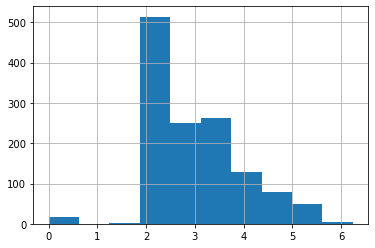

In [46]:
df_titanic['norm_fare'] = np.log(df_titanic.Fare+1)
df_titanic['norm_fare'].hist()

In [47]:
df_feature = df_titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'cabin_multiple', 'norm_fare', 'train_test']]
df_feature = pd.concat([df_feature,pd.get_dummies(df_titanic[['Embarked', 'cabin_adv', 'name_title']])], axis=1)

In [48]:
df_feature.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,cabin_multiple,norm_fare,train_test,Embarked_C,...,name_title_ Master,name_title_ Miss,name_title_ Mlle,name_title_ Mme,name_title_ Mr,name_title_ Mrs,name_title_ Ms,name_title_ Rev,name_title_ Sir,name_title_ the Countess
0,3,0,22.0,1,0,7.2500,0,2.110213,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,1,4.280593,1,1,...,0,0,0,0,0,1,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,2.188856,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,1,3.990834,1,0,...,0,0,0,0,0,1,0,0,0,0
4,3,0,35.0,0,0,8.0500,0,2.202765,1,0,...,0,0,0,0,1,0,0,0,0,0


## Normalization

In [49]:
X = df_feature
y = df_titanic['Survived'].values

In [50]:
print(y)

[ 0.  1.  1. ... nan nan nan]


In [51]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.84044746, -0.74189971, -0.60780782,  0.48027176, -0.44540733,
        -0.50212639, -0.47214019, -0.89685632,  0.68570491, -0.51026115,
        -0.32231217,  0.65572717, -0.1308458 , -0.22504019, -0.27837711,
        -0.19099472, -0.17995962, -0.12778773, -0.06196972, -0.02767123,
         0.53754501, -0.02767123, -0.05540613, -0.02767123, -0.02767123,
        -0.07847664, -0.02767123, -0.02767123, -0.03914801, -0.22126152,
        -0.49712916, -0.03914801, -0.02767123,  0.8523803 , -0.420021  ,
        -0.03914801, -0.07847664, -0.02767123, -0.02767123],
       [-1.55011801,  1.34789107,  0.63678752,  0.48027176, -0.44540733,
         0.73579729,  1.27104408,  1.34714418,  0.68570491,  1.95978079,
        -0.32231217, -1.52502451, -0.1308458 , -0.22504019,  3.59224934,
        -0.19099472, -0.17995962, -0.12778773, -0.06196972, -0.02767123,
        -1.86030934, -0.02767123, -0.05540613, -0.02767123, -0.02767123,
        -0.07847664, -0.02767123, -0.02767123, -0.03914801, -0.

Train-test split

In [52]:
X_train = df_feature[df_feature.train_test == 1].drop(['train_test'], axis = 1)
X_test = df_feature[df_feature.train_test == 0].drop(['train_test'], axis = 1)
y_train = df_titanic[df_titanic.train_test == 1].Survived

y_train.shape

(889,)

In [53]:
from sklearn.preprocessing import StandardScaler

all_dummies_scaled = df_feature.copy()
all_dummies_scaled[['Age', 'SibSp', 'Parch', 'norm_fare']] = StandardScaler().fit_transform(all_dummies_scaled[['Age', 'SibSp', 'Parch', 'norm_fare']])

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

## Model Building

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [55]:
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.66292135 0.69662921 0.7752809  0.76966292 0.72881356]
0.7266615882689011


In [56]:
lr = LogisticRegression(max_iter = 1000)
cv = cross_val_score(lr, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.80898876 0.82022472 0.80337079 0.82022472 0.85310734]
0.8211832666793626


In [57]:
tree = tree.DecisionTreeClassifier(criterion='entropy')
cv = cross_val_score(tree, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.76404494 0.78651685 0.81460674 0.75280899 0.79661017]
0.7829175395162826


In [58]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.65730337 0.69101124 0.73595506 0.7247191  0.72881356]
0.7075604646733955


In [59]:
rfc = RandomForestClassifier()
cv = cross_val_score(rfc, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.82022472 0.7752809  0.83707865 0.75842697 0.83615819]
0.8054338856090902


In [60]:
svc = SVC(probability = True)
cv = cross_val_score(svc, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.59550562 0.71348315 0.68539326 0.68539326 0.68926554]
0.6738081635244081


Logistic regression appears to work best out of the other machine learning models built with an accuracy of ~0.83. This model will be submitted for grading and compared to the control submission. 

In [61]:
lr.fit(X_train, y_train)
yhat = lr.predict(X_test). astype(int)

base_submission = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': yhat})
base_submission.to_csv('base_submission.csv', index=False)
print('Your submission was successfully saved!')

Your submission was successfully saved!


This submission of the logistic regression model yielded an accuracy slightly better than the control submission with a score of roughly 0.77. We will now try a voting classifier to see if this has any effect on the accuracy. 

In [62]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr', lr), ('knn', knn), ('gnb', gnb), ('svc', svc), ('dt', tree), ('rf', rfc)], voting = 'soft')

In [63]:
cv = cross_val_score(voting_clf, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.76966292 0.80898876 0.83146067 0.80337079 0.83615819]
0.8099282676315622


In [64]:
voting_clf.fit(X_train, y_train)
yhat2 = voting_clf.predict(X_test). astype(int)

base_submission2 = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': yhat2})
base_submission2.to_csv('base_submission2.csv', index=False)
print('Your submission was successfully saved!')

Your submission was successfully saved!


The voting classifier performed worse with a score of roughly 0.74. Lets try tuning the parameters of the models to improve the performance.

# Parameter Tuning

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [66]:
param_lr = {'max_iter': [2000],
           'penalty': ['l1', 'l2'],
           'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
           'solver': ['liblinear', 'lbfgs']}

clf_lr = GridSearchCV(lr, param_grid = param_lr, cv=5, verbose=True, n_jobs=-1)
best_lr = clf_lr.fit(X_train, y_train)
print('Best Score: ' + str(best_lr.best_score_))
print('Best Parameters: ' + str(best_lr.best_params_))

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.5s


Best Score: 0.8223068621849807
Best Parameters: {'C': 1, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    5.9s finished


In [67]:
param_knn = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree'],
            'p': [1, 2]}

clf_knn = GridSearchCV(knn, param_grid = param_knn, cv=5, verbose=True, n_jobs=-1)
best_knn = clf_knn.fit(X_train, y_train)
print('Best Score: ' + str(best_knn.best_score_))
print('Best Parameters: ' + str(best_knn.best_params_))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.4s


Best Score: 0.7502761378784992
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    3.7s finished


In [68]:
#param_SVC = [{'kernel': ['rbf'], 'gamma': [.1, .5, 1, 2, 5, 10],
             'C': [0.1, 1, 10, 100, 1000]},
            {'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]}]

#clf_SVC = GridSearchCV(svc, param_grid = param_SVC, cv=5, verbose=True, n_jobs=-1)
#best_SVC = clf_SVC.fit(X_train_scaled, y_train)
#print('Best Score: ' + str(best_SVC.best_score_))
#print('Best Parameters: ' + str(best_SVC.best_params_))

IndentationError: unexpected indent (<ipython-input-68-4a31e477238d>, line 2)

In [69]:
param_rfc = {'n_estimators': [100, 500, 1000],
           'bootstrap': [True, False],
           'max_depth': [3, 5, 10, 20, 50, 75, 100, None],
           'max_features': ['auto', 'sqrt'],
           'min_samples_leaf': [1, 2, 4, 10],
           'min_samples_split': [2, 5, 10]}

clf_rfc = RandomizedSearchCV(rfc, param_distributions = param_rfc, cv=5, verbose=True, n_jobs=-1, n_iter=100)
best_rfc = clf_rfc.fit(X_train_scaled, y_train)
print('Best Score: ' + str(best_rfc.best_score_))
print('Best Parameters: ' + str(best_rfc.best_params_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.2min


Best Score: 0.8346664127467784
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.7min finished


In [70]:
param_rfc = {'n_estimators': [400, 450, 500, 550],
           'criterion': ['gini', 'entropy'],
           'bootstrap': [True],
           'max_depth': [15, 20, 25],
           'max_features': ['auto', 'sqrt', 10],
           'min_samples_leaf': [2,3],
           'min_samples_split': [2,3]}

clf_rfc = GridSearchCV(rfc, param_grid = param_rfc, cv=5, verbose=True, n_jobs=-1)
best_rfc = clf_rfc.fit(X_train_scaled, y_train)
print('Best Score: ' + str(best_rfc.best_score_))
print('Best Parameters: ' + str(best_rfc.best_params_))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 11.1min finished


Best Score: 0.8414079857804863
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 25, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 400}


In [71]:
yhat3 = best_rfc.best_estimator_.predict(X_test_scaled).astype(int)
rfc_submission = {'PassengerId': test.PassengerId, 'Survived': yhat3}
rfc_submission = pd.DataFrame(data=rfc_submission)
rfc_submission.to_csv('rfc_submission.csv', index=False)
print('Your submission was successfully saved!')

Your submission was successfully saved!
